In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
import random

Using TensorFlow backend.


In [2]:
(xtr,ytr),(xts,yts) = mnist.load_data()
y_true = yts

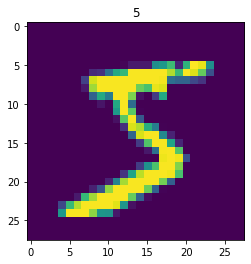

In [3]:
plt.imshow(xtr[0])
plt.title(ytr[0])
plt.show()

In [4]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')

xtr shape:(60000, 28, 28)
ytr shape:(60000,)


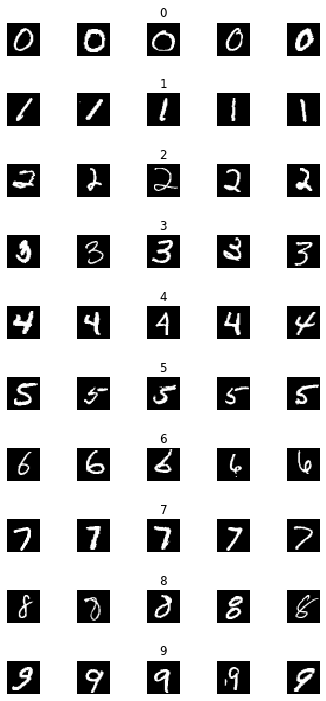

In [5]:
n_cols = 5
n_classes = 10

fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()

for i in range(n_cols):
    for j in range(n_classes):
        
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i==2:
            axes[j][i].set_title(str(j))

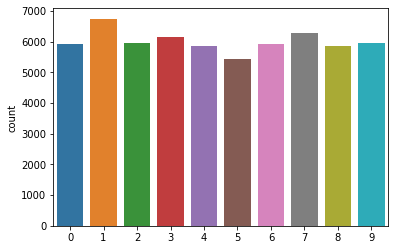

In [6]:
sns.countplot(ytr)
plt.show()

# Pre-processing

In [7]:
xtr = xtr.reshape(xtr.shape[0],28,28,1)   #(no. of images, height, width,channels)

xtr = xtr/255

In [8]:
xts = xts.reshape(xts.shape[0],28,28,1)
xts = xts/255

# OneHotEncoding ytr array

In [9]:
from keras.utils.np_utils import to_categorical
ytr = to_categorical(ytr,10)   #10 represents number of classes/categories
yts = to_categorical(yts,10)

# Image Agumentation 

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,zoom_range=0.1, rotation_range=10)

# Creating Nural Net Model

In [11]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [12]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,183,306
Trainable params: 1,183,306
Non-trainable params: 0
____________________________________________

In [13]:
h = model.fit_generator(datagen.flow(xtr,ytr,batch_size=50),steps_per_epoch=1000, epochs=10,verbose=1,validation_data=(xts,yts))

Epoch 1/10
1000/1000 [==============================] - 46s 46ms/step - loss: 0.3249 - accuracy: 0.8994 - val_loss: 0.0829 - val_accuracy: 0.9723
Epoch 2/10
1000/1000 [==============================] - 61s 61ms/step - loss: 0.1292 - accuracy: 0.9604 - val_loss: 0.0416 - val_accuracy: 0.9873
Epoch 3/10
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0961 - accuracy: 0.9695 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 4/10
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0838 - accuracy: 0.9748 - val_loss: 0.0327 - val_accuracy: 0.9882
Epoch 5/10
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0462 - val_accuracy: 0.9830
Epoch 6/10
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0670 - accuracy: 0.9781 - val_loss: 0.0393 - val_accuracy: 0.9871
Epoch 7/10
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.0335 -

In [14]:
model.save('model_mnist.h5')

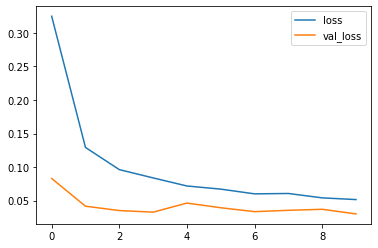

In [15]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

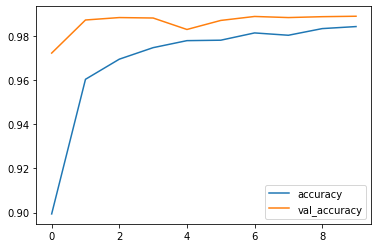

In [16]:
plt.plot(h.history['accuracy'],label='accuracy')
plt.plot(h.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Predicting images

In [17]:
import cv2


In [18]:

img = cv2.imread(r"C:\Users\mukes\Desktop\Datasets\digit.png")

In [19]:
img.shape

(389, 385, 3)

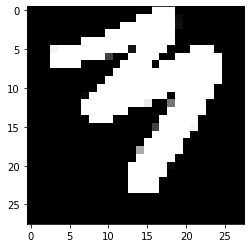

In [20]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()


In [21]:
img = img.reshape(1,28,28,1)
img = img/255


In [22]:
model.predict_classes(img)

array([9], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix


In [24]:
y_pred = model.predict_classes(xts)

In [25]:
print(confusion_matrix(y_true,y_pred))

[[ 974    0    1    0    1    0    2    0    1    1]
 [   2 1124    1    1    1    1    1    1    2    1]
 [   1    0 1028    2    0    0    0    1    0    0]
 [   0    0    2  998    0    7    0    1    0    2]
 [   0    0    0    0  978    0    1    0    0    3]
 [   1    0    0    3    0  879    3    1    0    5]
 [   6    2    0    0    0    5  944    0    1    0]
 [   0    0    5    3    1    0    0 1013    1    5]
 [   1    0    2    1    1    3    0    2  961    3]
 [   0    0    0    0   12    1    0    1    4  991]]


In [26]:
# img = cv2.bitwise_not(img)   #required when image is in white background unlike in this case

(1, 24, 24, 32)
(1, 12, 12, 32)


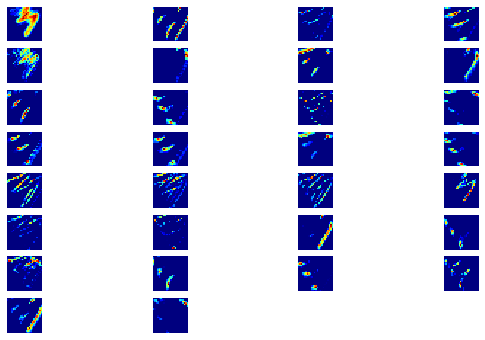

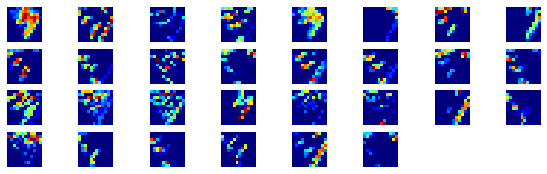

In [27]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)


#layer1
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
    plt.axis("off")
    
#layer2
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(8,8,i+1)
    plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap('jet'))
    plt.axis("off")
    